# Edge detection
### Canny filter
### Morphological operator
## Tasks
* Try different thresholds for binarization (lena)
* Apply skeletonize, erosion to bin images (lena,camera)
* Apply canny filter (lena, camera)


### Binarization

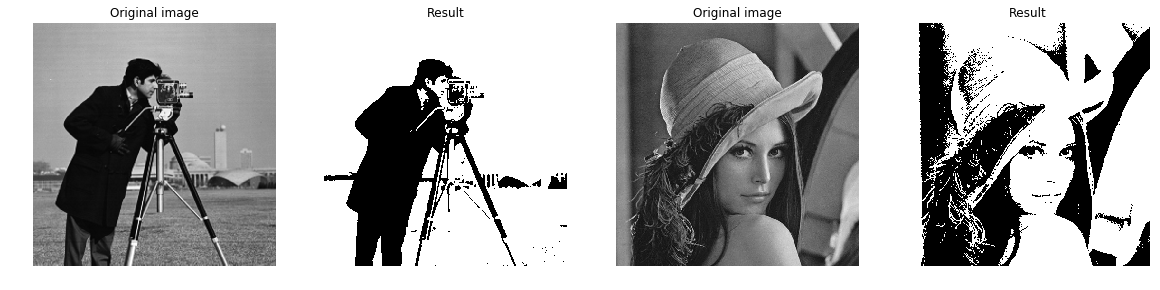

In [7]:
import numpy as np

from skimage import data
import matplotlib.pyplot as plt
import scipy.misc as simg

image = data.camera()
lena = simg.imread("./lena_cover.jpg", mode="L")

tt = 80
binary = image > tt
binary2 = lena > tt

fig, axes = plt.subplots(ncols=4, figsize=(20,30));
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

ax[2].imshow(lena, cmap=plt.cm.gray)
ax[2].set_title('Original image')

ax[3].imshow(binary2, cmap=plt.cm.gray)
ax[3].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

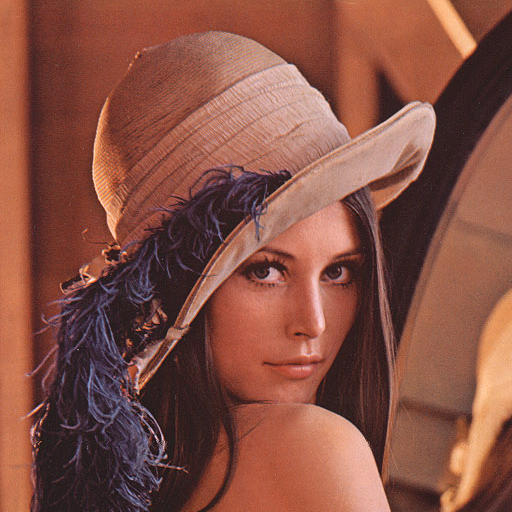

### Example of canny filter

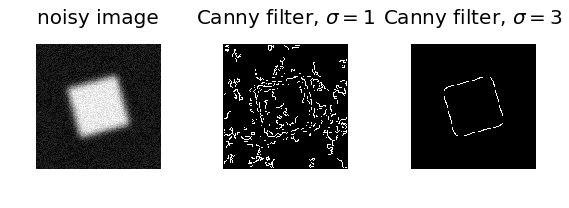

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [17]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
    plt.show()

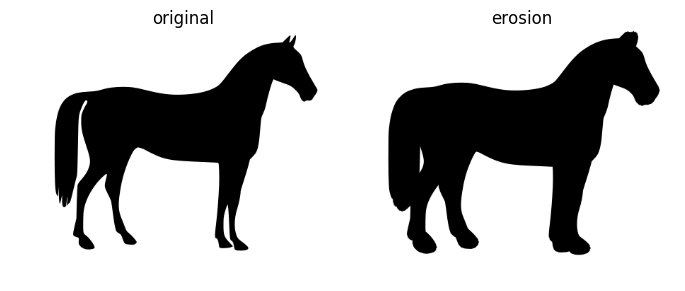

In [3]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing
horse = io.imread(os.path.join(data_dir, "horse.png"), as_grey=True)
selem = disk(6)
eroded = erosion(horse, selem)
plot_comparison(horse, eroded, 'erosion')

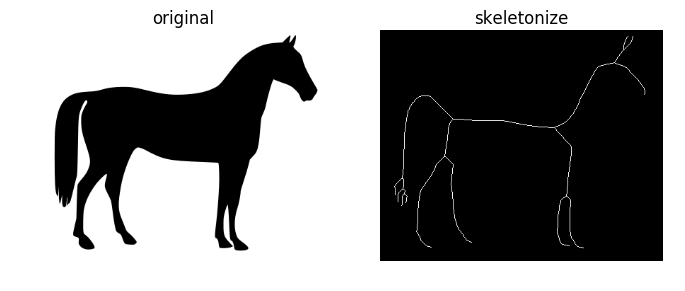

In [6]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, opening, closing
horse = io.imread(os.path.join(data_dir, "horse.png"), as_grey=True)
selem = disk(6)
sk = skeletonize(horse == 0)
plot_comparison(horse, sk, 'skeletonize')

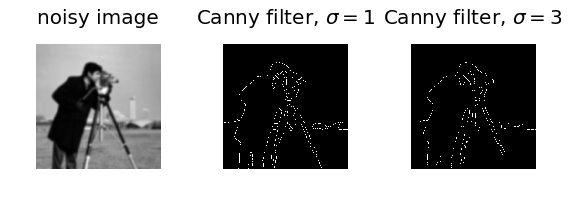

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = data.camera()
im = ndi.gaussian_filter(im, 4)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

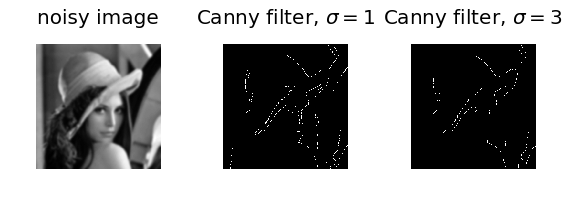

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = simg.imread("./lena_cover.jpg", mode="L")

im = ndi.gaussian_filter(im, 4)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

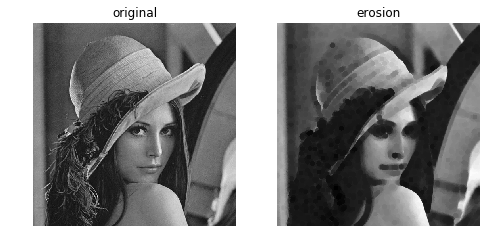

In [18]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing
imlen = simg.imread("./lena_cover.jpg", mode="L")
selem = disk(6)
eroded = erosion(imlen, selem)
plot_comparison(imlen, eroded, 'erosion')

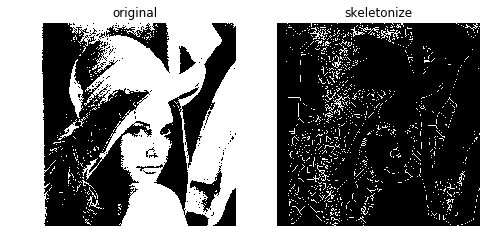

In [26]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, opening, closing
from skimage import color
imlen = simg.imread("./lena_cover.jpg", mode="L")
imgLena = color.rgb2gray(imlen)

tt = np.median(imgLena)
binary = imgLena > tt

selem = disk(6)
sk = skeletonize(binary == 0)
plot_comparison(binary, sk, 'skeletonize')

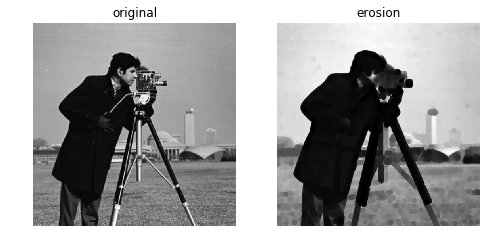

In [27]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing
cameraman = data.camera()
selem = disk(6)
eroded = erosion(cameraman, selem)
plot_comparison(cameraman, eroded, 'erosion')

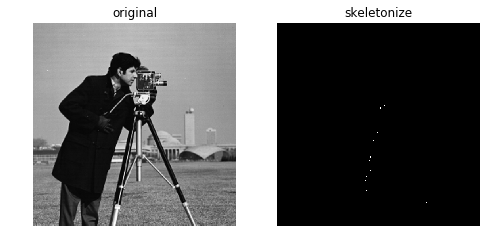

In [28]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, opening, closing
from skimage import color
cameraman = data.camera()
selem = disk(6)
sk = skeletonize(cameraman == 0)
plot_comparison(cameraman, sk, 'skeletonize')